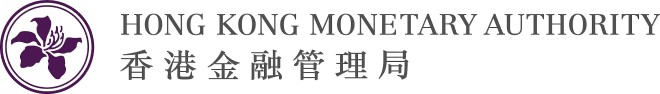

# 透過金管局API收取可靠數據

## [Daily Monetary Statistics 每日金融數據](https://www.hkma.gov.hk/chi/data-publications-and-research/data-and-statistics/daily-monetary-statistics/)
## [API Detailed Documentation 應用程式介面詳細規格](https://apidocs.hkma.gov.hk/chi/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
## [API Documentation 使用說明](https://apidocs.hkma.gov.hk/documentation/)
## [JSON Output sample JSON格式示範](https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-monetary-base?pagesize=500&choose=end_of_date&from=2022-10&to=2024-07&sortorder=desc)

In [1]:
import numpy as np
import pandas as pd
import requests
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
apiFrom = '2022-01-01'
apiTo = '2025-08-01'

try:
    response = requests.get(f"https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity?pagesize=1000&choose=end_of_date&from={apiFrom}&to={apiTo}&sortorder=desc")
    if response.status_code==200 : print('Connect successfully!')
    data = response.json()
except Exception as e:
    print(e)

Connect successfully!


In [5]:
df_mbase = pd.DataFrame(data['result']['records'])
df_mbase = df_mbase.set_index('end_of_date')  
df_mbase.index = pd.to_datetime(df_mbase.index)
df_mbase = df_mbase.sort_values('end_of_date')
df_mbase

,cu_weakside,cu_strongside,disc_win_base_rate,hibor_overnight,hibor_fixing_1m,twi,opening_balance,closing_balance,market_activities,interest_payment,...,forex_trans_t4,other_market_activities_t4,reversal_of_discount_window_t4,interest_payment_issuance_efbn_t4,forecast_aggregate_bal_t4,forex_trans_u,other_market_activities_u,reversal_of_discount_window_u,interest_payment_issuance_efbn_u,forecast_aggregate_bal_u
end_of_date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,7.85,7.75,0.50,0.03,0.14929,95.1,377516,377516,0,0,...,None,None,None,None,NaN,0,0,0,-35035,337480
2022-01-04,7.85,7.75,0.50,0.02,0.14298,95.5,377516,377516,0,0,...,None,None,None,None,NaN,0,0,0,-35030,337480
2022-01-05,7.85,7.75,0.50,0.02,0.13655,95.4,377516,372511,0,-5005,...,None,None,None,None,NaN,0,0,0,-35030,337480
2022-01-06,7.85,7.75,0.50,0.01,0.13512,95.5,372511,372511,0,0,...,None,None,None,None,NaN,0,0,0,-35030,337480
2022-01-07,7.85,7.75,0.50,0.01,0.12976,95.4,372511,372511,0,0,...,None,None,None,None,NaN,0,0,0,-30029,337479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-28,7.85,7.75,4.75,0.52,1.02321,102.9,86346,86346,+0,+0,...,None,None,None,None,NaN,+0,+0,-0,-287,86077
2025-07-29,7.85,7.75,4.75,0.45,1.02143,103.2,86346,86346,+0,+0,...,None,None,None,None,NaN,+0,+0,-0,-400,86077
2025-07-30,7.85,7.75,4.75,0.35,1.03244,103.1,86346,86477,+0,+131,...,None,None,None,None,NaN,+0,+0,-0,-400,82152


In [7]:
df_mbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 882 entries, 2022-01-03 to 2025-08-01
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   cu_weakside                                      882 non-null    float64
 1   cu_strongside                                    882 non-null    float64
 2   disc_win_base_rate                               882 non-null    float64
 3   hibor_overnight                                  882 non-null    float64
 4   hibor_fixing_1m                                  882 non-null    float64
 5   twi                                              882 non-null    float64
 6   opening_balance                                  882 non-null    int64  
 7   closing_balance                                  882 non-null    int64  
 8   market_activities                                882 non-null    object 
 9   interest_paym

# 下載相同時段time frame的恒指數據

In [8]:
df_HSI = yf.download('^HSI', start=apiFrom, end=apiTo, auto_adjust=True, progress=False).droplevel('Ticker', axis=1)
df_HSI.index = df_HSI.index.strftime('%Y-%m-%d')
df_HSI.head(3)

Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,23274.750000,23605.029297,23193.189453,23510.539062,734300000
2022-01-04,23289.839844,23439.300781,23146.890625,23400.619141,1760100000
2022-01-05,22907.250000,23323.769531,22851.500000,23323.769531,2768900000


# 合併相應的時段的基本利率Base Rate往 DataFrame

In [9]:
df_HSI['HKBaseRate'] = df_mbase['disc_win_base_rate']
df_HSI['HKclosingBal'] = df_mbase['closing_balance']
df_HSI.index = pd.to_datetime(df_HSI.index)
df_HSI.head(3)

Price,Close,High,Low,Open,Volume,HKBaseRate,HKclosingBal
Date,,,,,,,
2022-01-03,23274.750000,23605.029297,23193.189453,23510.539062,734300000,0.5,377516
2022-01-04,23289.839844,23439.300781,23146.890625,23400.619141,1760100000,0.5,377516
2022-01-05,22907.250000,23323.769531,22851.500000,23323.769531,2768900000,0.5,372511


# 比較Discount Window (貼現窗) Base Rate (基本利率) 與 恒指的收市價

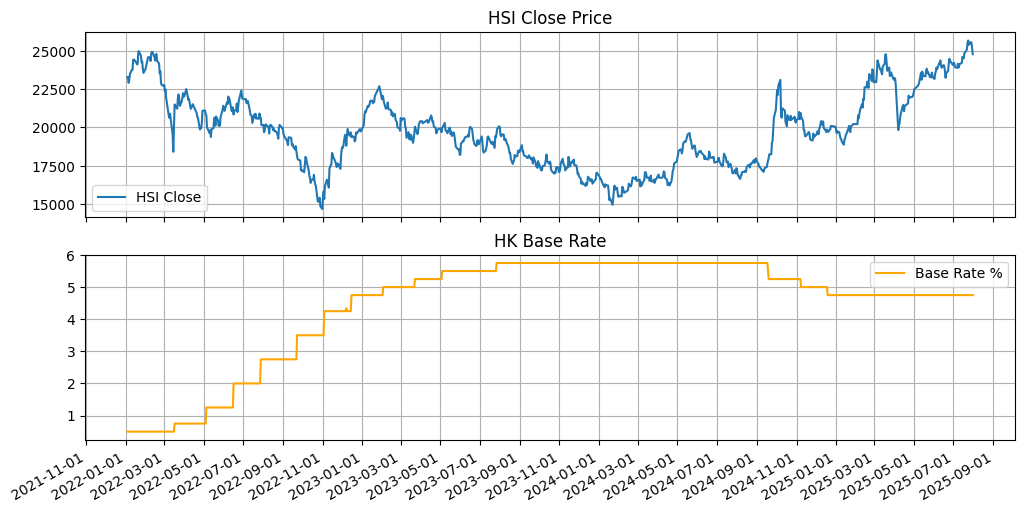

In [10]:
fig, (ax0, ax1 ) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax0.plot(df_HSI.index, df_HSI['Close'])
ax1.plot(df_HSI.index, df_HSI['HKBaseRate'],color='orange' )
ax0.set_title("HSI Close Price")
ax1.set_title("HK Base Rate")
ax0.grid(True)
ax1.grid(True)
ax0.legend(['HSI Close'])
ax1.legend(['Base Rate %'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
plt.show()

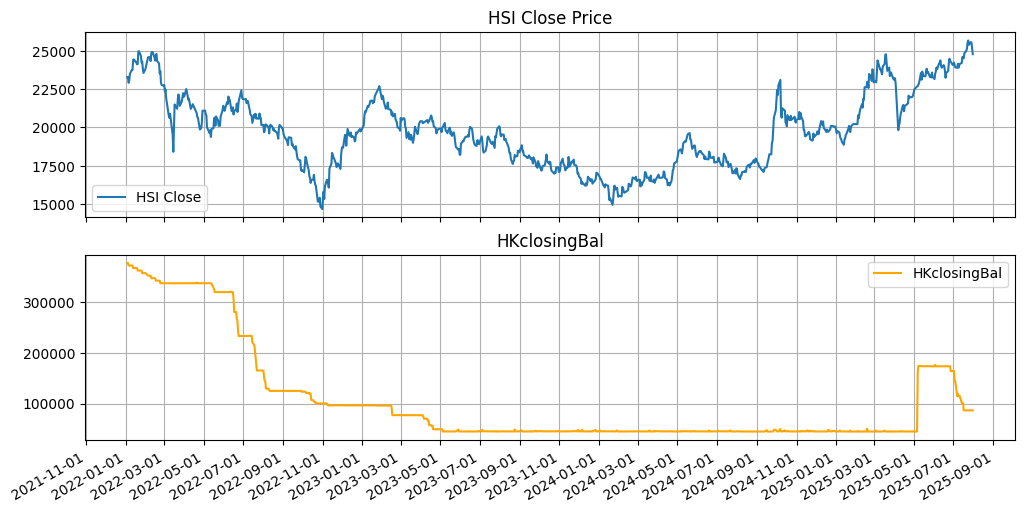

In [11]:
fig, (ax0, ax1 ) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax0.plot(df_HSI.index, df_HSI['Close'])
ax1.plot(df_HSI.index, df_HSI['HKclosingBal'],color='orange' )
ax0.set_title("HSI Close Price")
ax1.set_title("HKclosingBal")
ax0.grid(True)
ax1.grid(True)
ax0.legend(['HSI Close'])
ax1.legend(['HKclosingBal'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
plt.show()

# 查看Correlation 的關係

In [12]:
df_HSI['Close'].corr(df_HSI['HKBaseRate'])

-0.47477989338246374

In [13]:
df_HSI[['Close','HKBaseRate','HKclosingBal']].corr()['Close']

Price
Close           1.000000
HKBaseRate     -0.474780
HKclosingBal    0.499844
Name: Close, dtype: float64